# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.

In [1]:
# setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random



In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [5]:
dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
target_col = 'price'

In [6]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,34590.0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,16590.0,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,7800.0,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,27995.0,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,500.0,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


In [7]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.000000,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.000000,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.000000,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.000000,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.000000,clean,other,4wd,full-size,bus,green,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,2018.0,ford,ecosport titanium awd,good,4 cylinders,gas,38450.000000,salvage,automatic,fwd,full-size,SUV,black,wy
4030,2002.0,ford,f 350,good,6 cylinders,diesel,284097.166778,clean,manual,4wd,full-size,sedan,white,wy
4031,2012.0,mazda,mx-5 miata grand touring,good,6 cylinders,gas,29993.000000,clean,other,rwd,full-size,other,silver,wy
4032,2005.0,honda,civic,good,6 cylinders,gas,236787.000000,clean,automatic,4wd,full-size,coupe,white,wy


y

0       34590.0
1       16590.0
2        7800.0
3       27995.0
4         500.0
         ...   
4029     8550.0
4030     6500.0
4031    19990.0
4032     4277.0
4033     7477.0
Name: price, Length: 4034, dtype: float64

In [8]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [9]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [10]:
# We are using category_encoders package for one-hot encoding.
# https://contrib.scikit-learn.org/category_encoders/

# uncomment and run this if needed.
!pip install category_encoders

In [11]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [14]:
# Convert categorical columns to Pandas category type

cats = X_all.select_dtypes(exclude=np.number).columns.tolist()
print("cats:")
display(cats)
for col in cats:
    X_all[col] = X_all[col].astype('category')

display(X_all.dtypes)
display(X_all.head())

cats:


['make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

year             float64
make            category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


## Data Dictionary

These are the columns we used from the Craigslist dataset.

|     Name     |  dtype   | Description | Null % | Notes |
|--------------|----------|--------------|--------------|--------------|
| price | float64 | Listed sale price | 0.0 |  | 
| year | float64 | Year of manufacture | 0.002823 | n/a |
| make | category | Auto manufacturer name | 0.041337 | Renamed from manufacturer |
| model | category | Car model name | 0.012362 | n/a |
| condition | category | Listed condition of vehicle | 0.407852 | n/a |
| cylinders | category | Number of engine cylinders | 0.416225 | n/a |
| fuel | category | Type of fuel used by vehicle (i.e. gas, deisel, electric) | 0.007058 | n/a |
| odometer | float64 | Odometer mileage of vehicle | 0.010307 | n/a |
| title_status | category | Status of vehicle title (i.e. clean, salvage) | 0.019308 | n/a |
| transmission | category | Type of vehicle transmission (i.e. automatic, manual) | 0.005988 | n/a |
| drive | category | Drive type of vehicle (i.e. fwd, 4wd) | 0.305863 | n/a |
| size | category | Size of vehicle(i.e. full-size) | 0.717675 | n/a |
| type | category | Vehicle type, (i.e. sedan,pickup) | 0.217527 | n/a |
| paint_color | category | Exterior paint color of vehicle | 0.305011 | n/a |
| state | category | State of vehicle location(i.e. WA, PI) | 0.000000 | n/a |

### Unused Columns

These columns we dropped after EDA before cleaning the data set.


    'id', 'url', 'region', 'VIN', 'region_url', 'county', 'lat', 'long', 'description', 'image_url', 'posting_date'
    
    
We dropped id, url, VIN, image_url because they are likely unique to each listing and uninformative.

We dropped posting_date because the dataset only has data from a limited time frame so this field is not likely to have a long enough date range to determine things like seasonality.


We dropped the columns region, region_url, county, lat, and long so that we could just use state as a single more easily usable column for the effect of the vehicle location on price.



In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)


In [17]:
# # try a model to see how it works as a baseline
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
# rf_model = RandomForestRegressor(max_depth=10)
# rf_model.fit(X_train, y_train)

In [18]:
# predict_train = rf_model.predict(X_train)
# predict_test  = rf_model.predict(X_test)

In [19]:
# print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
# print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

In [20]:
# plt.figure(figsize=(20,4))
# feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(6).plot(kind='barh');

In [21]:
# do that over as a pipeline

In [22]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [23]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()



In [24]:
# TODO: try ("selector", SelectPercentile(chi2, percentile=50)),

# TODO: try embedding instead
# https://github.com/cpa-analytics/embedding-encoder

# TODO: switching to LeaveOneOut becuase it makes feature importance output easier.
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [25]:
#!pip install --user xgboost
# try to get an up to date version.
#!pip install --user --upgrade xgboost

In [26]:
import xgboost as xgb

In [27]:
# NOTE: On my mac that gets me an XGBoost version with no GPU support,
# so I had to check out from Git and build it manually.

# on the Mac GPUs (at least on my M2 macbook air), the CUDA libraries that XGBoost uses do not support the GPU.
# This means we are stuck with CPU for XGBoost or run it on something else.
import platform
platform.processor()
plat = platform.system()
print("Platform: ", plat)


Platform:  Darwin


In [28]:
# hyperparameters for XGBoost
# set objective and enable GPU acceleration if available.
# plat = platform.system()

#     params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {"objective": "reg:squarederror"}

# Use "gpu_hist" for training the model.
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror")


In [29]:
# Setup pipelines for comparison


linear_pipeline = Pipeline(steps=[
                                  ('pre_processing',pre_process),
                                  ('reg', LinearRegression())
                                 ])

ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 
                                 ('reg', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])


xgb_pipeline = Pipeline(steps=[('xgb_pre_processing',xgb_pre_process),
                                 ('reg', xgb_reg)
                                 ])

pipelines = {
    'linear':linear_pipeline,
    'ridge': ridge_pipeline,
    'lasso': lasso_pipeline,
    'random_forest': rf_pipeline,
    'xgboost': xgb_pipeline
}


In [30]:
from sklearn.model_selection import cross_validate

In [31]:
def cross_validate_pipeline(label, pipeline):    
    # scoring = "neg_mean_absolute_percentage_error"
    scoring = "neg_mean_squared_error"
    n_cv_folds = 3

    print("cross validate for:", label)
    result = cross_validate(pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
    display(result)

    return result

In [33]:
def plot_residuals(predict_train, predict_test):

    plt.scatter(
        predict_train,
        predict_train - y_train,
        c='blue',
        marker='o',
        label='Training data')

    plt.scatter(
        predict_test,
        predict_test - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
    #plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()



In [34]:

def show_samples(X_vals, y_vals, predictions):
    samples = X_vals.copy()
    samples[target_col] = y_vals
    samples['predicted_price'] = predictions
    display(samples)

    

In [35]:
from sklearn.metrics import r2_score

def score_pipeline(pipeline):
    predict_train = pipeline.predict(X_train)
    predict_test = pipeline.predict(X_test)
    
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    scores = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'score': score,
        'r2_score': r2, 
    }
    results = {
        'scores':scores,
        'predict_train': predict_train,
        'predict_test': predict_test
    }
    print("scores:", scores)
    return results

In [143]:
import joblib
from datetime import datetime

def save_model(model_name, model, use_ts=True):
    if use_ts:
        rn = datetime.now()
        dts = '_' + rn.strftime("%Y_%m_%d_%H_%M_%S")
    else:
        dts = ''

    dest_path = f"model_{model_name}{dts}.pkl"
    print(f"Saving model to {dest_path}")
    joblib.dump(model, dest_path)
    
    return dest_path

def load_model(model_path):
    print(f"Loading model from {model_path}")
    model = joblib.load(model_path)
    return model


In [73]:
def eval_pipeline(label, pipeline):
    cross_validate_pipeline(label, pipeline)
    
    rmod = pipeline.fit(X_train, y_train)
    # TODO: show graph while fitting.
    display(rmod)
    
    
   
    
    
    results = score_pipeline(pipeline)
     
    show_samples(X_test, y_test, results['predict_test'])
    plot_residuals(results['predict_train'], results['predict_test'])
    
    return rmod, results

In [ ]:
all_results = []
for label, pipeline in pipelines.items():
    show_heading(f"Evaluating {label}", 2)
    rmod, results = eval_pipeline(label, pipeline)
    scores = {'label': label}
    scores.update(results['scores'])
    all_results.append(scores)

In [39]:
df = pd.DataFrame.from_dict(all_results)

show_heading("Pipeline Score Summary")
display(df)

Pipeline Score Summary

,label,train_rmse,test_rmse,score,r2_score
0,linear,5169.910542,10082.661973,0.460111,0.460111
1,ridge,7407.307995,8870.752758,0.582098,0.582098
2,lasso,7037.659249,8856.043193,0.583483,0.583483
3,random_forest,6029.671987,8549.260492,0.611840,0.611840
4,xgboost,4923.206798,8235.825315,0.639780,0.639780


In [112]:
def plot_evals_result(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    x = None
    
    lines = {}
    for key, values in results.items():
        print("key:", key)
        if x is None:
            n_rounds = len(values)
            x = np.linspace(0, n_rounds, n_rounds)
            
        lines[key],  = ax.plot(x, values, label=key)
        ax.legend()

    plt.show()
    

In [113]:
# Callback for xgboost to save error metrics by epoch.
class EvalCapture(xgb.callback.TrainingCallback):
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.lines = {}
        self.x = np.linspace(0, self.rounds, self.rounds)
        self.evals_log = None
        
    def _get_key(self, data, metric):
        return f'{data}-{metric}'

    def evals_result(self):
        # return results as dict of array of values for each round.
        results = {}
        
        #display(self.evals_log) # TODO:
        for data, metric in self.evals_log.items():
            for metric_name, log in metric.items():
                key = self._get_key(data, metric_name)
                results[key] = log
        return results
         
        
    def after_iteration(self, model, epoch, evals_log):
        # Keep most recent log
        self.evals_log = evals_log
        return False

In [125]:
def xgboost_fit(X_train, y_train, X_test, y_test, enable_cat, n_rounds = 5000):
    # This is the non pipeline version for helping with measuring feature importance.

    # Convert to the format XGBoost lib expects.
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=enable_cat)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=enable_cat)

    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    evals_capture = EvalCapture(n_rounds)
    
    model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n_rounds,
      evals=evals,
      verbose_eval=50, # print every N rounds
      early_stopping_rounds=10,  # stop if no improvement to validation loss in N rounds.
      callbacks=[evals_capture]
    )

    print("results")
    evals_result = evals_capture.evals_result()
    plot_evals_result(evals_result)
       
    
    predict_test = model.predict(dtest_reg)
    predict_train = model.predict(dtrain_reg)
    
    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
        
    return model
# xgboost_fit() 

[0]	validation-rmse:22454.01981	train-rmse:23187.70081
[50]	validation-rmse:15333.27904	train-rmse:15674.59398
[100]	validation-rmse:11636.01305	train-rmse:11457.25848
[150]	validation-rmse:9853.79724	train-rmse:9114.11500
[200]	validation-rmse:9081.14973	train-rmse:7826.68962
[250]	validation-rmse:8765.42861	train-rmse:7108.63895
[300]	validation-rmse:8615.34152	train-rmse:6641.20424
[350]	validation-rmse:8539.05585	train-rmse:6334.23160
[400]	validation-rmse:8485.06322	train-rmse:6092.92843
[450]	validation-rmse:8440.75381	train-rmse:5923.75545
[500]	validation-rmse:8405.56027	train-rmse:5755.97766
[550]	validation-rmse:8368.73176	train-rmse:5599.38454
[600]	validation-rmse:8333.51719	train-rmse:5484.40147
[650]	validation-rmse:8318.67065	train-rmse:5387.17988
[700]	validation-rmse:8303.18204	train-rmse:5289.68771
[750]	validation-rmse:8273.37300	train-rmse:5166.06649
[800]	validation-rmse:8238.28379	train-rmse:5039.22210
[850]	validation-rmse:8217.88084	train-rmse:4945.36443
[900]	v

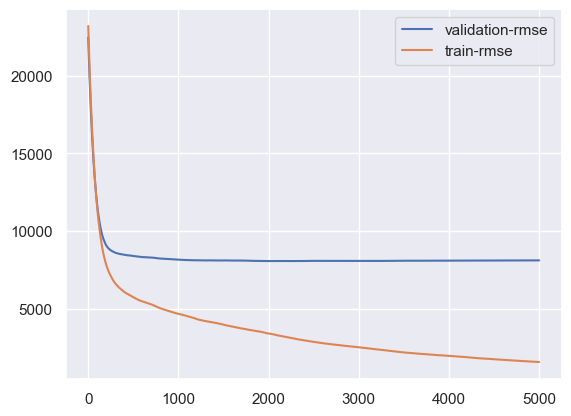

RMSE of train data:  1590.0223137396313
RMSE of test data:  8122.660276137012
R2 Score of test data: 0.6496111742344994


In [126]:
# Train a separate model to do feature importance
params['learning_rate'] = .01 # learning_rate
model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=True) 


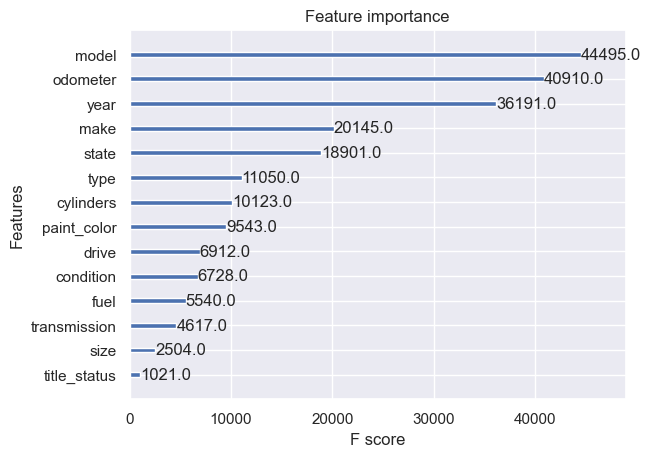

In [122]:
n_features_max = 50

from xgboost import plot_importance
plot_importance(model, max_num_features=20)



In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
    
n_pca_comp = 10

# Using LeaveOneOut and PCA
cat_encoder = Pipeline([
    ('LOO', ce.LeaveOneOutEncoder(return_df=False)),
    ('PCA', PCA(n_components = n_pca_comp,random_state=193))
])

alt_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])

In [128]:
def train_random_forest(xreg_train, yreg_train, xreg_test, yreg_test):
    RF_regressor = Pipeline([('pre_processing',alt_pre_process),
                             ('reg', RandomForestRegressor(max_depth=15,random_state=191))])

    RF_regressor.fit(xreg_train, yreg_train)

    predict_train = RF_regressor.predict(xreg_train)
    predict_test = RF_regressor.predict(xreg_test)

    train_rmse = mean_squared_error(yreg_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(yreg_test, predict_test)**(0.5)
  
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    return RF_regressor

In [134]:
print("Random Forest")
rf_pipeline = train_random_forest(X_train, y_train, X_test, y_test)
rf_model = rf_pipeline['reg']

Random Forest
RMSE of train data:  4604.13496145374
RMSE of test data:  8039.8645750019305
model score: 0.640
R2 score 0.6567179180842626


In [136]:
def score_xgb_model(X_train, y_train, X_test, y_test):
    n_rounds = 1000    
    xgb_model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=False, n_rounds=n_rounds) 
    return xgb_model

XGBoost
[0]	validation-rmse:22456.81500	train-rmse:23178.83144
[50]	validation-rmse:15195.10786	train-rmse:15222.11668
[100]	validation-rmse:11282.01604	train-rmse:10638.29790
[150]	validation-rmse:9421.49522	train-rmse:8045.87326
[200]	validation-rmse:8610.56179	train-rmse:6593.18048
[250]	validation-rmse:8285.88054	train-rmse:5778.53053
[300]	validation-rmse:8151.05807	train-rmse:5321.18304
[350]	validation-rmse:8103.59177	train-rmse:5015.58593
[400]	validation-rmse:8089.74119	train-rmse:4819.06033
[450]	validation-rmse:8080.12092	train-rmse:4660.43575
[500]	validation-rmse:8070.19121	train-rmse:4518.65973
[550]	validation-rmse:8060.78473	train-rmse:4409.26268
[600]	validation-rmse:8058.77026	train-rmse:4315.25801
[650]	validation-rmse:8054.02998	train-rmse:4235.65373
[700]	validation-rmse:8053.34290	train-rmse:4164.66777
[750]	validation-rmse:8051.44001	train-rmse:4093.61423
[800]	validation-rmse:8052.09338	train-rmse:4020.41771
[850]	validation-rmse:8053.88269	train-rmse:3957.10146

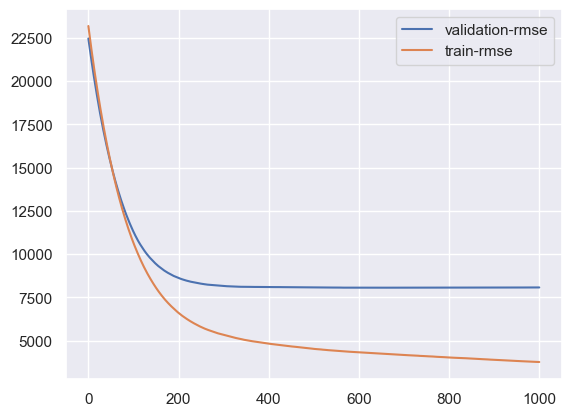

RMSE of train data:  3759.586070985157
RMSE of test data:  8068.864004696706
R2 Score of test data: 0.6542370459009877


In [145]:
alt_pre_process.fit(X_train, y_train)

X_pre_train =  alt_pre_process.transform(X_train)
X_pre_test =  alt_pre_process.transform(X_test)
print("XGBoost")
xgb_model = score_xgb_model(X_pre_train, y_train, X_pre_test, y_test)

In [146]:
# save the model
save_model("xgboost_s", model, use_ts=True)

Saving model to model_xgboost_s_ft_2023_03_12_17_50_18.pkl


'model_xgboost_s_ft_2023_03_12_17_50_18.pkl'